In [95]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Dataset

In [96]:
(train_images,train_labels),(test_images,test_labels) = keras.datasets.mnist.load_data()    
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
train_images = (train_images/255)

BUFFER_SIZE = train_images.shape[0]
BATCH_SIZE = 100

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Descriminator Model

In [97]:
def discriminator_Model():
    model = keras.Sequential()
    model.add(layers.Conv2D(10,(3,3),padding = "same",input_shape=(28,28,1)))
    model.add(layers.Flatten())
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(50,activation="relu"))
    model.add(layers.Dense(1,activation = "sigmoid"))
    return model

In [98]:
discriminator = discriminator_Model()

In [118]:
discriminator_optimizer = tf.keras.optimizers.RMSprop(1e-4)

In [100]:
def get_descriminator_loss(real_predictions,fake_predictions):
    real_loss = tf.keras.losses.binary_crossentropy(tf.ones_like(real_predictions),real_predictions)
    fake_loss = tf.keras.losses.binary_crossentropy(tf.zeros_like(fake_predictions),fake_predictions)
    return real_loss+fake_loss

# Generator Model

In [101]:
def Generator_Model():
    model = keras.Sequential()
    model.add(layers.Dense(7*7*256,input_shape = (100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.Reshape((7,7,256)))
    model.add(layers.Conv2DTranspose(128,(3,3),padding = "same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2DTranspose(64,(3,3),strides = (2,2), padding = "same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2DTranspose(1,(3,3),strides = (2,2), padding = "same",activation = "sigmoid"))
    return model

In [102]:
generator = Generator_Model()

In [115]:
generator_optimizer = tf.keras.optimizers.RMSprop(1e-4)

In [104]:
def get_generator_loss(fake_predictions):
    fake_loss = tf.keras.losses.binary_crossentropy(tf.ones_like(fake_predictions),fake_predictions)
    return fake_loss

# Train GAN

In [107]:
def Train(trainData,epochs):
    for e in range(epochs):
        for images in trainData:
            images = tf.cast(images,tf.dtypes.float32)
            train_step(images)

In [108]:
def train_step(images):
    fake_image_noise = np.random.rand(BATCH_SIZE,100).astype("float32")
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(fake_image_noise)
      real_output = discriminator(images)
      fake_output = discriminator(generated_images)

      gen_loss = get_generator_loss(fake_output)
      disc_loss = get_descriminator_loss(real_output, fake_output)


      gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
      gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    
    
      generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
      discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
      print("generated_loss : ", np.mean(gen_loss), end = "        ")
      print("Discriminator_loss : ", np.mean(disc_loss))

In [119]:
Train(train_dataset,2)

generated_loss :  0.31326148        Discriminator_loss :  15.333239
generated_loss :  0.31326148        Discriminator_loss :  15.333239
generated_loss :  0.31326148        Discriminator_loss :  15.333239
generated_loss :  0.31326148        Discriminator_loss :  15.333239
generated_loss :  0.31326148        Discriminator_loss :  15.333239
generated_loss :  0.31326148        Discriminator_loss :  15.333239
generated_loss :  0.31326148        Discriminator_loss :  15.333239
generated_loss :  0.31326148        Discriminator_loss :  15.333239
generated_loss :  0.31326148        Discriminator_loss :  15.333239
generated_loss :  0.31326148        Discriminator_loss :  15.333239
generated_loss :  0.31326148        Discriminator_loss :  15.333239
generated_loss :  0.31326148        Discriminator_loss :  15.333239
generated_loss :  0.31326148        Discriminator_loss :  15.333239
generated_loss :  0.31326148        Discriminator_loss :  15.333239
generated_loss :  0.31326148        Discriminato

# Test Generator Model

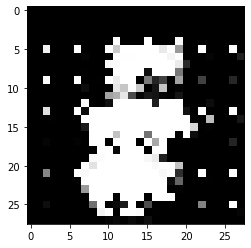

In [121]:
GenImage = generator(np.random.rand(1,100))
plt.imshow(tf.reshape(GenImage,(28,28)),cmap = "gray")